# Задание N 05. Исследование зависимости светимости от температуры для абсолютно черного тела.

Абсолютно черное тело излучает энергию пропорционально четвертой степени температуры
$$ E = 36.9 * 10^{-12} T^4 $$
(E-мощность излучения в вт/см, Т-температура в градусах Кельвина).
Часть общей энергии, заключенная в видимом спектре частот, с длиной волны от $\lambda_1$ до $\lambda_2$ находится интегрированием уравнения Планка:

$$
E_{видимая} = E_{в} = \int\limits_{\lambda_1}^{\lambda_2} 
\frac{2.39 * 10^{-11}dx}{x^{5}(e^{\frac{1.432}{Tx}} - 1)} 
$$



Тогда светимость (в процентах) рассчитывается по формуле:
$$
EFF = \frac{E_{в}}{E} * 100\% = \frac{64.77}{T^4} * \int\limits_{\lambda_1}^{\lambda_2} 
\frac{dx}{x^{5}(e^{\frac{1.432}{Tx}} - 1)} 
$$


Значение $\lambda_1 = y * 31.66675 * 10^{-5},\ где\ y\ -\ корень\ уравнения: 2 * \sqrt{x} = \cos{\frac{\pi*x}{2}}$


Найдем решение уравнения  и  получим
$$
        y = x = 0.221050639495735\ =>
        \\ \lambda_1 = 6.999955338251567 * 10^{-5}
$$

Значение $\lambda_2 = - z * 3.039830 * 10^{-5},\ где\ z\ -\ значение,\ минимизирующее\ f(z)\ на\ [-2, -1]:
$

$f(z) = (e^z)*(2*z^{2}-4) + (2*z^{2}-1)^{2} + e^{2*z} - 3*z^{4}$

Найдем значение z и  получим 
$$
        \ z = -1.3159745 =>
        \\ \lambda_2 = 4.000338764335*10^{-5}
$$

#### Вычислить EFF в диапазоне температур от Т=1000 К до Т=9000 К с шагом 1000 К.

*По полученным данным построить график светимости от
температуры, взяв достаточное количество точек.*

*Оценить погрешность результата и влияние на
точность погрешности в задании $\lambda_1$ и $\lambda_2$*

In [23]:
"""
lambda1 = y * 31.66675 * 10**(-5),
    где y - корень уравнения:
    2 * sqrt(x) = cos((PI*x)/2)
    x ~= 0.221050639495735

lambda2 = -z * 3.039830 * 10**(-5),
    где z - значение, минимизирующее f(z) на [-2, -1]
    f(z) = (e**z)*(2*z**2-4) + (2*z**2-1)**2 + e**(2*z) - 3*z**4


EFF = (E_в / E) * 100% =
64.77 / (T**4) * (integrate from lambda1 to lambda 2:
    dx / ((x**5) * (e**(1.432/(Tx)) - 1) )
"""
print(
    "Для решения этой задачи и был написан этот блокнот. Достаточно просто запустить ниже написанные блоки кода по очереди")

Для решения этой задачи и был написан этот блокнот. Достаточно просто запустить ниже написанные блоки кода по очереди


Напишем функции для нахождения x и z

In [24]:
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.integrate import quad
import numpy as np
from math import sqrt, cos, pi

accuracy = 1e-16


def fun_x(x):
    return 2 * sqrt(x[0]) - cos((pi * x[0]) / 2)


def fun_z(z):
    return (np.e ** z) * (2 * z ** 2 - 4) + (2 * z ** 2 - 1) ** 2 + np.e ** (2 * z) - 3 * z ** 4


Найдем х используя метод fsolve

In [25]:
res_x = optimize.fsolve(fun_x, np.array([0]))
print(res_x)
# [0.22105064]

[0.22105064]


Найдем значение z, минимизирующее f(z) на промежутке [-2,-1]

In [26]:
lower_bound = -2
upper_bound = -1
bounds = optimize.Bounds(lower_bound, upper_bound)
res_z = optimize.minimize(fun_z,
                          np.array((lower_bound + upper_bound) / 2),
                          bounds=bounds,
                          method='TNC',
                          tol=accuracy).x
print(res_z)
# [-1.31597378]

[-1.31597378]


Вычислим полученные лямбды по формулам. Заметим, что для того, чтобы наши расчеты имели какой-то смысл, $\lambda_1$ должна быть меньше $\lambda_2$.
Поэтому отсортируем их в порядке возрастания

In [27]:
L_1 = res_x[0] * 31.66675 * 10 ** (-5)
L_2 = -res_z[0] * 3.039830 * 10 ** (-5)
L_1, L_2 = sorted([L_1, L_2])
print(f'TEST: lambda_1 = {L_1}; lambda_2 = {L_2}')

# lambda_1 = 4.000336578604378e-05
# lambda_2 = 6.999955338251561e-05

TEST: lambda_1 = 4.000336578604378e-05; lambda_2 = 6.999955338251561e-05


Для повторного поиска лямбд напишем функцию, благодаря которой мы сможем находить лямбды с разной точностью методов модуля scipy.optimize для нахождения х и минимизации z

In [28]:
def get_lambdas(fun_x, fun_z, accuracy=1e-16):
    res_x = optimize.fsolve(fun_x, np.array([0]), xtol=accuracy)
    print(f'INFO: res_x = {res_x}')
    # [0.22105064]

    lower_bound = -2
    upper_bound = -1
    bounds = optimize.Bounds(lower_bound, upper_bound)
    res_z = optimize.minimize(fun_z,
                              np.array((lower_bound + upper_bound) / 2),
                              bounds=bounds,
                              method='TNC',
                              tol=accuracy).x
    print(f'INFO: res_z = {res_z}')
    # [-1.3159745]
    L_1 = res_x[0] * 31.66675 * 10 ** (-5)
    L_2 = -res_z[0] * 3.039830 * 10 ** (-5)
    L_1, L_2 = sorted([L_1, L_2])
    print(f'INFO: lambda_1 = {L_1}; lambda_2 = {L_2}')

    # lambda_1 = 4.000336578604378e-05
    # lambda_2 = 6.999955338251561e-05
    return L_1, L_2

Запишем подынтегральное выражение в виде функции integrand и воспользуемся ей для вычисления EFF.
В данном случае нижняя граница интегрирования (l_bound) = $\lambda_1$, верхняя (u_bound) = $\lambda_2$.
T - аргумент подынтегрального выражения

In [29]:
def integrand(x, T):
    return 1 / ((x ** 5) * (np.exp(1.432 / (T * x)) - 1))


def EFF(T, l_bound, u_bound):
    return (
            64.77 / (T ** 4) * quad(integrand, l_bound, u_bound, args=T, epsabs=accuracy)[0]
    )

## Давайте протестируем взятие интеграла.

In [30]:
T = 1000.0
lambda_1, lambda_2 = get_lambdas(fun_x, fun_z, accuracy)
print(
    f'TEST:\n!wa integrate from {lambda_1} to {lambda_2} dx / ((x^5)(e^((1.432)/{T} * x) - 1) = {quad(integrand, lambda_1, lambda_2, args=T, epsabs=accuracy)[0]}')
# Получаем такой запрос для WolframAlpha
# integrate from 4.000336578604378*10^(-5)  to  6.999955338251561*10^(-5): dx/((x^5) * (e^(1.432 / (1000 * x)) - 1))
# 3.085873.2325267694 - вычисленный интеграл в WolframAlpha
# Или, как он выводит - 3.08587×10^6

# Значения должны совпадать (при тестировании было достигнуто совпадение до 3-х и более знаков после запятой)

INFO: res_x = [0.22105064]
INFO: res_z = [-1.31597378]
INFO: lambda_1 = 4.000336578604378e-05; lambda_2 = 6.999955338251561e-05
TEST:
!wa integrate from 4.000336578604378e-05 to 6.999955338251561e-05 dx / ((x^5)(e^((1.432)/1000.0 * x) - 1) = 3085873.232526763


Замечательно, теперь, убедившись, что все работает и интегрируется так, как должно напишем метод, чтобы вычислять значения EFF для соответсвующий ей температуры

In [31]:
def calculate_EFF(lambda_1, lambda_2, label='EFF'):
    ans = []
    T0 = 1000
    step = 1000
    for i in range(9):
        T = T0 + i * step
        # t_res = EFF(T, lambda_1, lambda_2)
        ans.append(EFF(T, lambda_1, lambda_2))

    T_values = list(range(T0, T0 + step * len(ans), step))

    return np.array(ans), T_values

# Вычислим EFF с исходными значениями $\lambda$

In [32]:
lambda_1, lambda_2 = get_lambdas(fun_x, fun_z, accuracy)
# Вычислим EFF с исходными значениями lambda
original_EFF, T_values = calculate_EFF(lambda_1, lambda_2)


INFO: res_x = [0.22105064]
INFO: res_z = [-1.31597378]
INFO: lambda_1 = 4.000336578604378e-05; lambda_2 = 6.999955338251561e-05


In [33]:
print(f'INFO: original EFF: {original_EFF}')

INFO: original EFF: [1.99872009e-04 8.05765806e-01 8.25492052e+00 2.10610037e+01
 3.18215384e+01 3.76797112e+01 3.93061363e+01 3.82222087e+01
 3.56993964e+01]


##### Создадим некоторое отклонение от исходных значений lambda
##### А также изменим немного точность, при которых были вычислены х и z: default - 1e-16

In [34]:
delta = 1e-6  # Вместо дельты может быть погрешностью измерений прибора или ошибка округления, поэтому мы также добавим случайность в уравнение.
# delta default: 1e-6
accuracy = 1e-16

In [35]:
# Получаем
new_lambdas = get_lambdas(fun_x, fun_z, accuracy)
lambda_1_new = new_lambdas[0] + delta * np.random.uniform(-1, 1)  # lambda_1 * 0.01
lambda_2_new = new_lambdas[1] + delta * np.random.uniform(-1, 1)  # lambda_2 * 0.01

print(f"INFO: Original lambda_1: {lambda_1}, Original lambda_2: {lambda_2}")
print(f"INFO: New lambda_1: {lambda_1_new}, New lambda_2: {lambda_2_new}")
print(f"INFO: ABS Difference in lambda_1: {np.abs(lambda_1 - lambda_1_new)}")
print(f"INFO: ABS Difference in lambda_2: {np.abs(lambda_2 - lambda_2_new)}")

INFO: res_x = [0.22105064]
INFO: res_z = [-1.31597378]
INFO: lambda_1 = 4.000336578604378e-05; lambda_2 = 6.999955338251561e-05
INFO: Original lambda_1: 4.000336578604378e-05, Original lambda_2: 6.999955338251561e-05
INFO: New lambda_1: 4.078329464173345e-05, New lambda_2: 7.021050439257922e-05
INFO: ABS Difference in lambda_1: 7.799288556896704e-07
INFO: ABS Difference in lambda_2: 2.1095101006361316e-07


# Вычислим EFF для новых значений лямбда
> И сравним полученный результат с ранее полученными значениями. 

In [36]:
new_EFF, T_values2 = calculate_EFF(lambda_1_new, lambda_2_new, label='New EFF')

 # Вычисляем разность между оригинальным значением and новым значением EFF

In [37]:
diff_EFF = np.abs(original_EFF - new_EFF)
div_diff_EFF = diff_EFF / original_EFF * 100

In [38]:
print(f"INFO: Original EFF: {original_EFF}")

INFO: Original EFF: [1.99872009e-04 8.05765806e-01 8.25492052e+00 2.10610037e+01
 3.18215384e+01 3.76797112e+01 3.93061363e+01 3.82222087e+01
 3.56993964e+01]


In [39]:
print(f"INFO: New EFF: {new_EFF}")

INFO: New EFF: [2.10729293e-04 8.23675418e-01 8.32221229e+00 2.09932652e+01
 3.14156735e+01 3.69065894e+01 3.82543727e+01 3.70075857e+01
 3.44197028e+01]


In [40]:
print(f"INFO: Difference in EFF: {diff_EFF}")

INFO: Difference in EFF: [1.08572838e-05 1.79096117e-02 6.72917736e-02 6.77384677e-02
 4.05864824e-01 7.73121769e-01 1.05176360e+00 1.21462298e+00
 1.27969357e+00]


In [41]:
print(f"INFO: div_diff_EFF: {div_diff_EFF}")

INFO: div_diff_EFF: [5.43211818 2.22268202 0.81517167 0.32162982 1.27544061 2.05182509
 2.67582545 3.1777938  3.58463644]


> Нарисуем их графики.
 
> А также графики погрешности (которые от запуска к запуску могут варьироваться из-за элемента случайности).

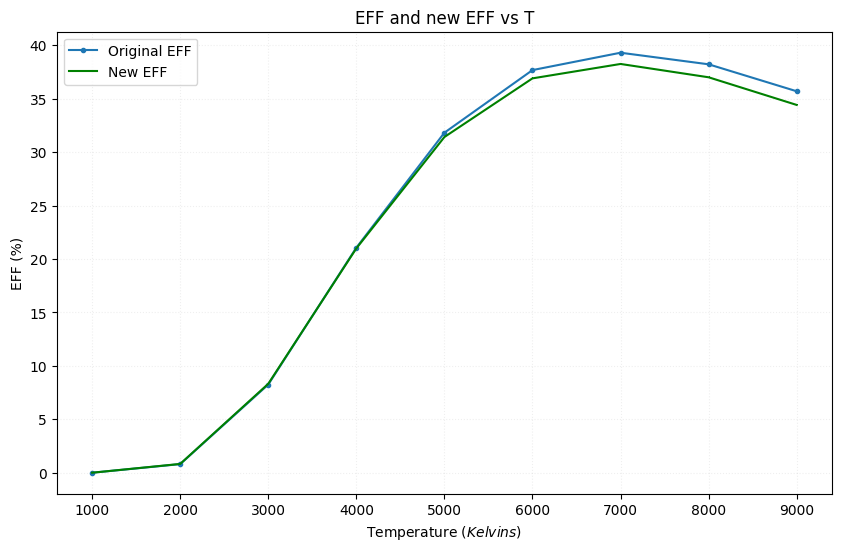

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(T_values, original_EFF, marker='.')
plt.title('EFF and new EFF vs T')
plt.xlabel('Temperature' + r' ($Kelvins$)')
plt.ylabel('EFF (%)')
plt.plot(T_values2, new_EFF, marker=',', color='green')
plt.legend(['Original EFF', 'New EFF'])
plt.grid(True, alpha=0.2, linestyle=':')
plt.show()

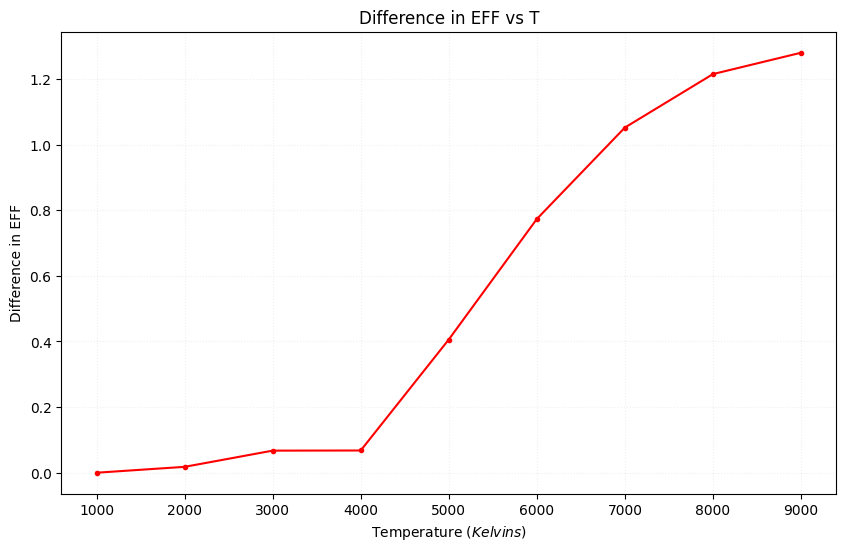

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(T_values, diff_EFF, marker='.', color='red')
plt.title('Difference in EFF vs T')
plt.xlabel('Temperature' + r' ($Kelvins$)')
plt.ylabel('Difference in EFF')
plt.grid(True, alpha=0.2, linestyle=':')

plt.show()

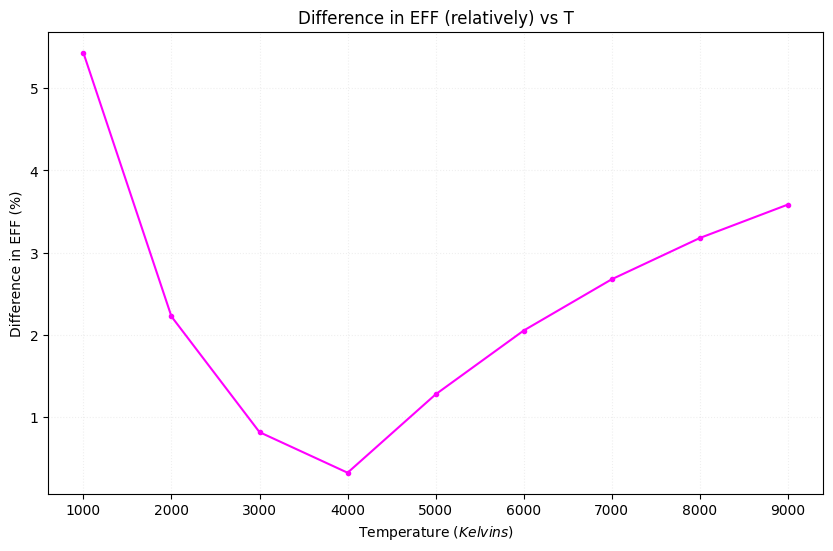

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(T_values, div_diff_EFF, marker='.', color='magenta')
plt.title('Difference in EFF (relatively) vs T')
plt.xlabel('Temperature' + r' ($Kelvins$)')
plt.ylabel('Difference in EFF (%)')
plt.grid(True, alpha=0.2, linestyle=':')

plt.show()